In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

/var/folders/bd/rn8my1zs30g5ml3258f07ft80000gn/T/ipykernel_19778/3998788439.py:6: RuntimeWarning: invalid value encountered in log
  cdf_inv = lambda x, l: -np.log(1-x)/l


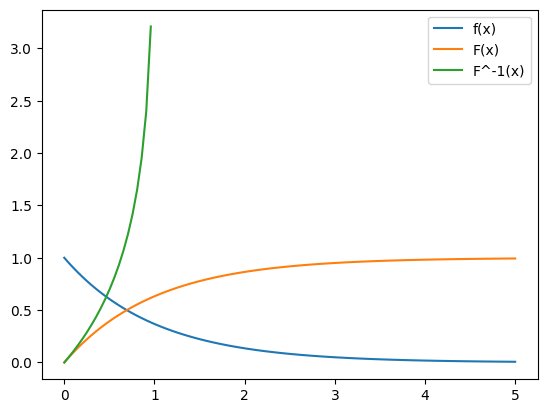

In [27]:
l = 1

# Exponential distribution
f = lambda x, l: l*np.exp(-l*x)
cdf = lambda x, l: 1-np.exp(-l*x)
cdf_inv = lambda x, l: -np.log(1-x)/l

theoretical_mean = 1/l
theoretical_variance = 1/l**2

# Plot of the exponential distribution
x = np.linspace(0, 5, 100)
plt.plot(x, f(x, l), label='f(x)')
plt.plot(x, cdf(x, l), label='F(x)')
plt.plot(x, cdf_inv(x, l), label='F^-1(x)')
plt.legend()
plt.show()


In [28]:
# Function to generate exponential numbers using the CDF inverse method
def generate_exponential_numbers(n, l):
    u = np.random.uniform(0, 1, n)
    return cdf_inv(u, l)

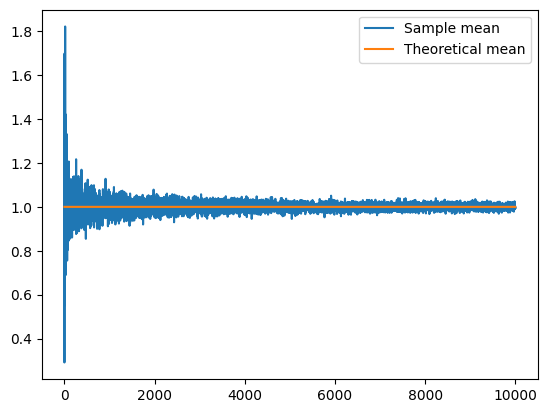

In [29]:
# Verification of the Law of Large Numbers
n = 10000
sample_mean = [np.mean(generate_exponential_numbers(i, l)) for i in range(1, n+1)]

# Plot sample mean vs theoretical mean
plt.plot(range(1, n+1), sample_mean, label='Sample mean')
plt.plot(range(1, n+1), [theoretical_mean]*n, label='Theoretical mean')
plt.legend()
plt.show()

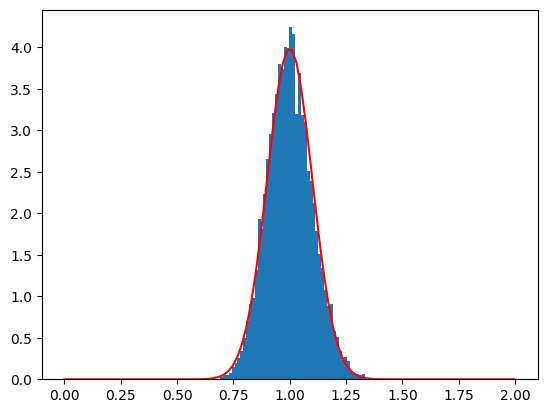

In [53]:
# Verification of the Central Limit Theorem
n = 10000
n_variables = 100
sample_mean = [np.mean(generate_exponential_numbers(n_variables, l)) for i in range(1, n+1)]

plt.hist(sample_mean, bins=60, density=True, label='Sample mean')

x = np.linspace(0, 2, n_variables)
plt.plot(x, stats.norm.pdf(x, theoretical_mean, np.sqrt(theoretical_variance/n_variables)), 'r', label="Normal Distribution")
